In [2]:
import torch

## STEP 1. Make data

In [6]:
# case 1
N = 20
random0 = torch.randn(int(N/2), 1)
random5 = torch.randn(int(N/2), 1) + 5
class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])

class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
x = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

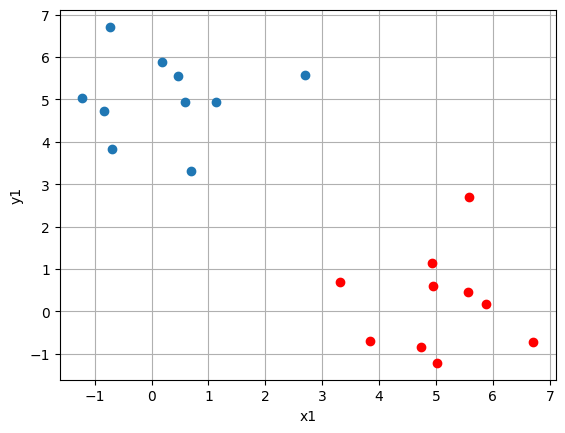

In [8]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('y1')
plt.grid()

## STEP2. Make Model

In [10]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        
        # case 1, plain
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

    
    def forward(self, x):
        x = self.linear(x)
        return x

In [15]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape)  # Enter the number of 5 coordinate values (x1, x2) data consisting of 2 values.

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP 3. Training Model

In [17]:
from torch import optim
import torch.nn.functional as F

LR = 1e-1 # case 1
EPOCH = 100 # case 2

optimizer  = optim.SGD(model.parameters(), lr=LR)

model.train() # change into train mode
for it in range(EPOCH):
    # inference
    y_hat = model(x)
    # loss
    loss = F.binary_cross_entropy(y_hat, y) # y_hat(prediction) should be in front of y(target) ==> (y_hat, y)
    # update
    loss.backward()
    optimizer.step()